In [1]:
!nvidia-smi

Sun Sep 29 23:32:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q gdown inference_gpu supervision

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.8/708.8 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.0/906.0 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install git+https://github.com/roboflow/sports.git

  Cloning https://github.com/roboflow/sports.git to /tmp/pip-req-build-buljzzic
  Running command git clone --filter=blob:none --quiet https://github.com/roboflow/sports.git /tmp/pip-req-build-buljzzic
  Resolved https://github.com/roboflow/sports.git to commit 06053616f1f8a8ae1fa936eb00dcdc2e4f888bb1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.6 MB/s eta 0:00:00
  Created wheel for sports: filename=sports-0.1.0-py3-none-any.whl size=10816 sha256=86f780c271e320f2866281581a7eb8ec343e6c91c1b3db61623f513b1780e2e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ggy7qg_/wheels/21/5e/7a/b369235e2c68018cae85f79cfc08f4f3e89254fc039608b7de
Successfully built sports


In [6]:
import os
os.environ['ONNXRUNTIME_EXECUTION_PROVIDERS'] = '[CUDAExecutionProvider]'

# Ball, Players, Goalkeepers, Referees Detection

In [7]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API = userdata.get('ROBOFLOW_API')
PLAYER_DETECTION_MODEL_ID = 'football-tracking-1yu0o/3'
PLAYER_DETECTION_MODEL = get_model(PLAYER_DETECTION_MODEL_ID, ROBOFLOW_API)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [13]:
import torch

# Check if CUDA is available
print("CUDA Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA Available: True
Current Device: 0
Device Name: Tesla T4


In [8]:
!gdown -O 'facupfinal2024.mp4' 'https://drive.google.com/uc?id=1lpBqm6d5P4HgUTiM4BNm4mRTxP2p5MPB'
!gdown -O 'clfinal2022.mp4' 'https://drive.google.com/uc?id=1vlwTFVR7L6HjUQEDTCA6s-h3_Uh6RA4k'
!gdown -O 'test1.mp4' 'https://drive.google.com/uc?id=1YJnese8EwAW4Bjh1BcfkjsKKq6gHZy2i'

Downloading...
From: https://drive.google.com/uc?id=1lpBqm6d5P4HgUTiM4BNm4mRTxP2p5MPB
To: /content/facupfinal2024.mp4
100% 3.46M/3.46M [00:00<00:00, 6.70MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vlwTFVR7L6HjUQEDTCA6s-h3_Uh6RA4k
To: /content/clfinal2022.mp4
100% 1.28M/1.28M [00:00<00:00, 208MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YJnese8EwAW4Bjh1BcfkjsKKq6gHZy2i
To: /content/test1.mp4
100% 19.8M/19.8M [00:00<00:00, 36.1MB/s]


In [70]:
def resolve_goalkeepers_team_id(
    players_detections: sv.Detections,
    goalkeepers_detections: sv.Detections
):
    goalkeepers_xy = goalkeepers_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

    team_0_centroid = players_xy[players_detections.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players_detections.class_id == 1].mean(axis=0)

    goalkeepers_team_ids = []

    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_ids)

In [71]:
from tqdm import tqdm
import supervision as sv
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = '/content/facupfinal2024.mp4'
TARGET_VIDEO_PATH = '/content/facupfinal2024_output.mp4'
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellispe_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER,
    text_scale=0.5,
    text_padding=3
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(all_detections)

        players_detections = all_detections[all_detections.class_id == PLAYER_ID]
        goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
        referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

        players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
        players_detections.class_id = team_classifier.predict(players_crops)

        goalkeepers_detections.class_id = resolve_goalkeepers_team_id(players_detections, goalkeepers_detections)

        referees_detections.class_id -= 1

        all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referees_detections])
        all_detections.class_id = all_detections.class_id.astype(int)

        labels = [
            f"#{tracker_id}"
            for tracker_id in all_detections.tracker_id
        ]

        annotated_frame = frame.copy()
        annotated_frame = ellispe_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)
        video_sink.write_frame(annotated_frame)

collecting crops: 26it [02:23,  5.53s/it]
Embedding extraction: 10it [00:03,  2.63it/s]
  0%|          | 0/781 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.57it/s]
  0%|          | 1/781 [00:08<1:54:23,  8.80s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.73it/s]
  0%|          | 2/781 [00:15<1:36:48,  7.46s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.69it/s]
  0%|          | 3/781 [00:21<1:29:34,  6.91s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  7.48it/s]
  1%|          | 4/781 [00:27<1:25:36,  6.61s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  8.45it/s]
  1%|          | 5/781 [00:34<1:26:00,  6.65s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.74it/s]
  1%|          | 6/781 [00:40<1:21:50,  6.34s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extra

In [9]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = '/content/facupfinal2024.mp4'
TARGET_VIDEO_PATH = '/content/facupfinal2024_output.mp4'
BALL_ID = 0

ellispe_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER,
    text_scale=0.5,
    text_padding=3
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id = all_detections.class_id - 1
        all_detections = tracker.update_with_detections(all_detections)

        labels = [
            f"#{tracker_id}"
            for tracker_id in all_detections.tracker_id
        ]

        annotated_frame = frame.copy()
        annotated_frame = ellispe_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)
        video_sink.write_frame(annotated_frame)

 99%|█████████▊| 770/781 [1:04:19<00:55,  5.01s/it]


collecting crops: 26it [02:05,  4.85s/it]
Embedding extraction: 10it [00:03,  2.65it/s]
Embedding extraction: 1it [00:00,  6.78it/s]


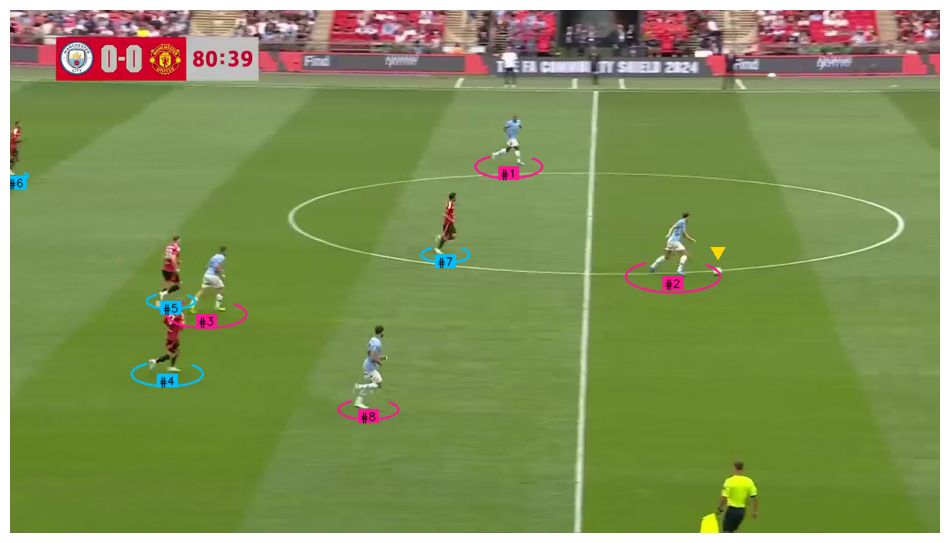

In [68]:
from tqdm import tqdm
import supervision as sv
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = '/content/facupfinal2024.mp4'
TARGET_VIDEO_PATH = '/content/facupfinal2024_output.mp4'
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellispe_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER,
    text_scale=0.5,
    text_padding=3
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.ColorPalette.from_hex(['#FFD700']),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(all_detections)

players_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops).astype(int)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referees_detections])
all_detections.class_id = all_detections.class_id.astype(int)

labels = [
    f"#{tracker_id}"
    for tracker_id in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellispe_annotator.annotate(annotated_frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)
sv.plot_image(annotated_frame)

In [46]:
from tqdm import tqdm

STRIDE = 30
PLAYER_ID = 2

def extract_crops(source_video_path: str):
  frame_generator = sv.get_video_frames_generator(source_video_path, stride=STRIDE)

  crops = []

  for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    crops += [
        sv.crop_image(frame, xyxy)
        for xyxy in detections.xyxy
    ]
  return crops

In [25]:
SOURCE_VIDEO_PATH = '/content/facupfinal2024.mp4'
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 26it [02:12,  5.10s/it]


In [47]:
len(crops)

290

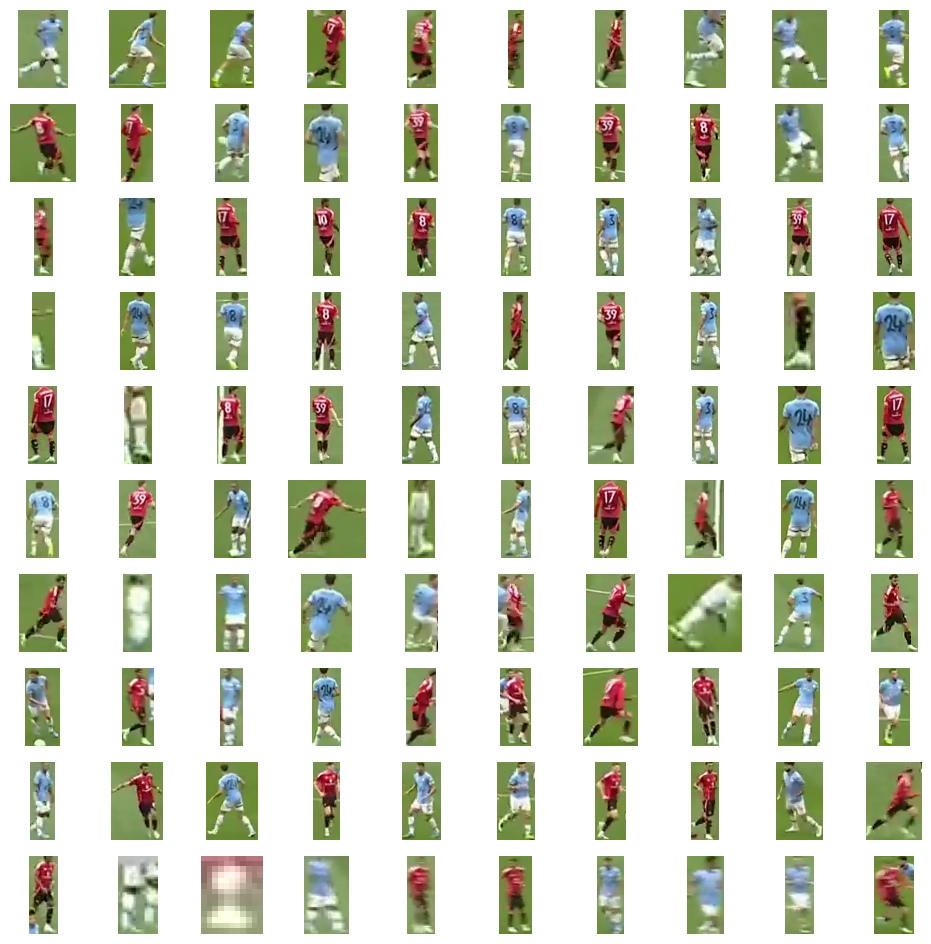

In [48]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [49]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

In [50]:
import numpy as np

from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []

with torch.no_grad():
  for batch in tqdm(batches, desc='embeddings extraction'):
    inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors='pt').to(DEVICE)
    outputs = EMBEDDINGS_MODEL(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
    data.append(embeddings)

data = np.concatenate(data)

embeddings extraction: 10it [00:03,  2.64it/s]


In [51]:
data.shape

(290, 768)

In [52]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [53]:
projections = REDUCER.fit_transform(data)

In [54]:
projections.shape

(290, 3)

In [55]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [56]:
clusters[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

In [57]:
team_0 = [
    crop
    for crop, cluster
    in zip(crops, clusters)
    if cluster == 0
]

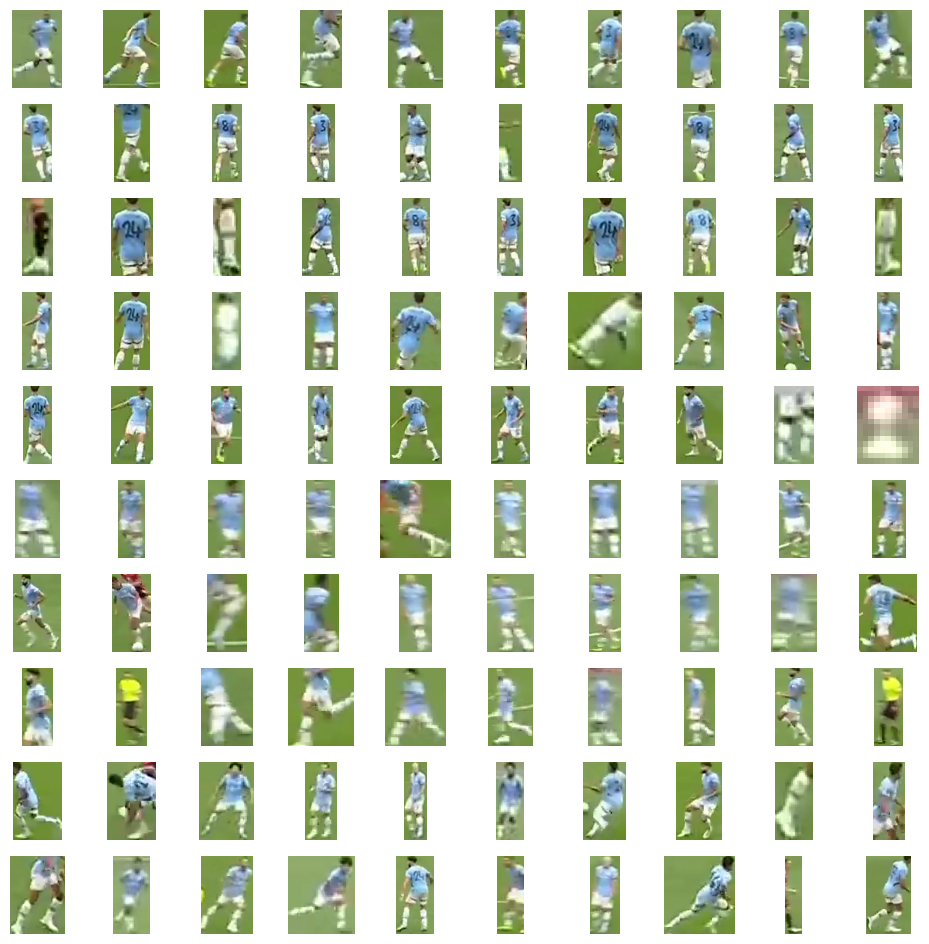

In [58]:
sv.plot_images_grid(team_0[:100], grid_size=(10, 10))